House Price Predictor


In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv('data.csv')

In [ ]:
housing.head()

In [ ]:
housing.info()

In [ ]:
housing['CHAS'].value_counts()

In [ ]:
housing.describe()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# from matplotlib.pyplot import figure


# housing.hist(bins=50,figsize=(20,15))

In [ ]:
#train-test splitting
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled  = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]  

In [ ]:
train_set,test_set = split_train_test(housing,0.2)
print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state =42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set.info()
strat_test_set.describe()

In [ ]:
strat_test_set['CHAS'].value_counts()

In [ ]:
strat_train_set['CHAS'].value_counts()

# Looking for co-relations

In [ ]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

In [ ]:
# from pandas.plotting import scatter_matrix
# attributes = ['MEDV','RM','ZN','LSTAT']
# scatter_matrix(housing[attributes],figsize=(12,8))

In [ ]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## Attribute Combinations

In [ ]:
housing['TAXRM'] = housing['TAX']/housing['RM']
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

In [ ]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## handling missing attribute


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

In [ ]:
imputer.statistics_.shape

In [ ]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns= housing.columns)
housing_tr.describe()

# Scikit-Learn Design

Primarily, three types of objects are
1. Estimators - It estimates some parameter based on a dataset. eg. Imputer 
2. Transformers - takes input and returns output based on the learnings from fit()
3. Predictors - LinearRegression model is an example of predictor. fit() function and predict() are two functions.It also gives 
                score() function to evaluate the predictions. 

# Features of Scaling
Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization) 
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this.
2. Standarization 
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this.    

# Creating a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
   ('imputer',SimpleImputer(strategy='median')),
   ('std_scaler',StandardScaler()) 
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr

# Selecting a desired model for price prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

In [ ]:
list(some_labels)

# Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
mse

# Use better evaluation technique - Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-scores)
rmse_score

In [ ]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("standard deviation: ",scores.std())

In [ ]:
print_scores(rmse_score)

In [ ]:
from joblib import dump,load
dump(model,'HPPM.joblib')

# Testing the model on test data

In [ ]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_text_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_text_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
prepared_data[0]

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        502 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PITRATIO  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284773,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705283,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# from matplotlib.pyplot import figure


# housing.hist(bins=50,figsize=(20,15))

In [9]:
#train-test splitting
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled  = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]  

In [10]:
train_set,test_set = split_train_test(housing,0.2)
print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f'Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}')

Rows in train set: 404
Rows in test set: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state =42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set.info()
strat_test_set.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      102 non-null    float64
 1   ZN        102 non-null    float64
 2   INDUS     102 non-null    float64
 3   CHAS      102 non-null    int64  
 4   NOX       102 non-null    float64
 5   RM        101 non-null    float64
 6   AGE       102 non-null    float64
 7   DIS       102 non-null    float64
 8   RAD       102 non-null    int64  
 9   TAX       102 non-null    int64  
 10  PITRATIO  102 non-null    float64
 11  B         102 non-null    float64
 12  LSTAT     102 non-null    float64
 13  MEDV      102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.305406,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.665977,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

# Looking for co-relations

In [16]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV        1.000000
RM          0.696282
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PITRATIO   -0.507787
LSTAT      -0.737663
Name: MEDV, dtype: float64

In [17]:
# from pandas.plotting import scatter_matrix
# attributes = ['MEDV','RM','ZN','LSTAT']
# scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

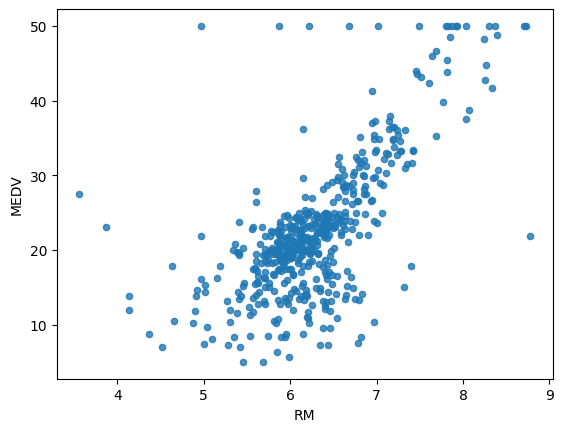

In [18]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## Attribute Combinations

In [19]:
housing['TAXRM'] = housing['TAX']/housing['RM']
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV        1.000000
RM          0.696282
ZN          0.360445
B           0.333461
DIS         0.249929
CHAS        0.175260
AGE        -0.376955
RAD        -0.381626
CRIM       -0.388305
NOX        -0.427321
TAX        -0.468536
INDUS      -0.483725
PITRATIO   -0.507787
TAXRM      -0.541196
LSTAT      -0.737663
Name: MEDV, dtype: float64

In [20]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## handling missing attribute


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_.shape

(13,)

In [23]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns= housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PITRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279052,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712905,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-Learn Design

Primarily, three types of objects are
1. Estimators - It estimates some parameter based on a dataset. eg. Imputer 
2. Transformers - takes input and returns output based on the learnings from fit()
3. Predictors - LinearRegression model is an example of predictor. fit() function and predict() are two functions.It also gives 
                score() function to evaluate the predictions. 

# Features of Scaling
Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization) 
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this.
2. Standarization 
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this.    

# Creating a pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
   ('imputer',SimpleImputer(strategy='median')),
   ('std_scaler',StandardScaler()) 
])

In [25]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [26]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired model for price prediction

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [28]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.561, 25.482, 16.353, 23.323, 23.337])

In [29]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluate the model

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
mse

1.3635918094059396

# Use better evaluation technique - Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-scores)
rmse_score

array([2.82088436, 2.69228537, 4.42403162, 2.6700713 , 3.31640769,
       2.61496846, 4.77223356, 3.32439939, 3.37219226, 3.19284824])

In [32]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("standard deviation: ",scores.std())

In [33]:
print_scores(rmse_score)

Scores:  [2.82088436 2.69228537 4.42403162 2.6700713  3.31640769 2.61496846
 4.77223356 3.32439939 3.37219226 3.19284824]
Mean:  3.320032225161364
standard deviation:  0.7006718828572054


In [36]:
from joblib import dump,load
dump(model,'HPPM.joblib')

['HPPM.joblib']

# Testing the model on test data

In [35]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_text_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_text_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

2.9328148995963086

In [38]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24023424, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])